# Multiple Linear Regression

#### Task: 
Predict the 40 yard dash of a nfl player

#### Dataset Given:
We will work with a dataset that contains NFL combine data of NFL prospects from the years 2000-2018. This dataet was obtained from kaggle and can be found in this link: https://www.kaggle.com/datasets/savvastj/nfl-combine-data?select=combine_data_since_2000_PROCESSED_2018-04-26.csv

#### Problem:
Not all players who enter the NFL combine participate in the 40 yard dash. 40 yard dash is an important metic that teams use to measure the speed of a player and has a great impact on the player's value and their draft position value.

#### Objective/Solution:
Create a machine learning algorithm that will predict the 40 yard dash based on the sample data from combines from 2000 to 2018. We want to create a model that will predict the 40 yard dash time ('Forty') of a player regardless of his postion. We will use data from multiple columns that correlate and have a relationship to the 'Forty' column. This will be useful to predict the 40 yard dash time of a player who enters the combine and do not participate in the 40 yard dash or is unable to particapate.

#### Conculsion:
This model can be helpful for NFL teams who need to chose the right players in NFL drafts based on their speed (40 yard dash time). Speed is usually concluded from the 40 yard dash test and is the single most important test an NFL skilled player will take to determine their speed. This model can give teams more insight and help make the best decision for their organization when drafting if a player has no 40 yard dash time from the NFL combine.

### Dataset information
- 16 attributes
- 6218 instances

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport

## Importing the dataset

In [2]:
data = pd.read_csv('combine_data.csv')
data.head()

Player  Pos  Ht   Wt  Forty  Vertical  BenchReps  BroadJump  \
0      John Abraham  OLB  76  252   4.55       NaN        NaN        NaN   
1   Shaun Alexander   RB  72  218   4.58       NaN        NaN        NaN   
2    Darnell Alford   OT  76  334   5.56      25.0       23.0       94.0   
3      Kyle Allamon   TE  74  253   4.97      29.0        NaN      104.0   
4  Rashard Anderson   CB  74  206   4.55      34.0        NaN      123.0   

   Cone  Shuttle  Year    Pfr_ID    AV                Team  Round   Pick  
0   NaN      NaN  2000  AbraJo00  26.0       New York Jets    1.0   13.0  
1   NaN      NaN  2000  AlexSh00  26.0    Seattle Seahawks    1.0   19.0  
2  8.48     4.98  2000  AlfoDa20   0.0  Kansas City Chiefs    6.0  188.0  
3  7.29     4.49  2000       NaN   0.0                 NaN    NaN    NaN  
4  7.18     4.15  2000  AndeRa21   6.0   Carolina Panthers    1.0   23.0

In [3]:
data.shape

(6218, 16)

## Data Preprocessing Part 1

In [4]:
# Drop unwanted columns and obvious unrelated columns to 'Forty' column.
data.drop(['Player', 'Pos', 'Year', 'Pfr_ID', 'AV', 'Team', 'Round', 'Pick'], axis=1, inplace=True)
data.head()

Ht   Wt  Forty  Vertical  BenchReps  BroadJump  Cone  Shuttle
0  76  252   4.55       NaN        NaN        NaN   NaN      NaN
1  72  218   4.58       NaN        NaN        NaN   NaN      NaN
2  76  334   5.56      25.0       23.0       94.0  8.48     4.98
3  74  253   4.97      29.0        NaN      104.0  7.29     4.49
4  74  206   4.55      34.0        NaN      123.0  7.18     4.15

## Exploratory Data Analysis (EDA)

In [5]:
# Check for linear relationships between columns and target column ('Forty').
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Based on the interactions part in the Pandas Profiling Report, the columns that have a positive linear relationship to 'Forty' column are 'Wt', 'Cone', 'Shuttle'. These are the columns we will use for our model and the other columns can be dropped.

## Data Preprocessing Part 2

In [6]:
# Now drop other unwanted columns.
data.drop(['Ht', 'Vertical', 'BenchReps', 'BroadJump'], axis=1, inplace=True)
data.head()

Wt  Forty  Cone  Shuttle
0  252   4.55   NaN      NaN
1  218   4.58   NaN      NaN
2  334   5.56  8.48     4.98
3  253   4.97  7.29     4.49
4  206   4.55  7.18     4.15

In [7]:
# Check for null values
data.isnull().sum()

Wt            0
Forty       172
Cone       2225
Shuttle    2155
dtype: int64

In [8]:
# Drop null values
data = data.dropna(how='any',axis=0)
data.shape

(3883, 4)

In [9]:
# Check for null values
data.isnull().sum()

Wt         0
Forty      0
Cone       0
Shuttle    0
dtype: int64

## Exploratory Data Analysis (EDA)

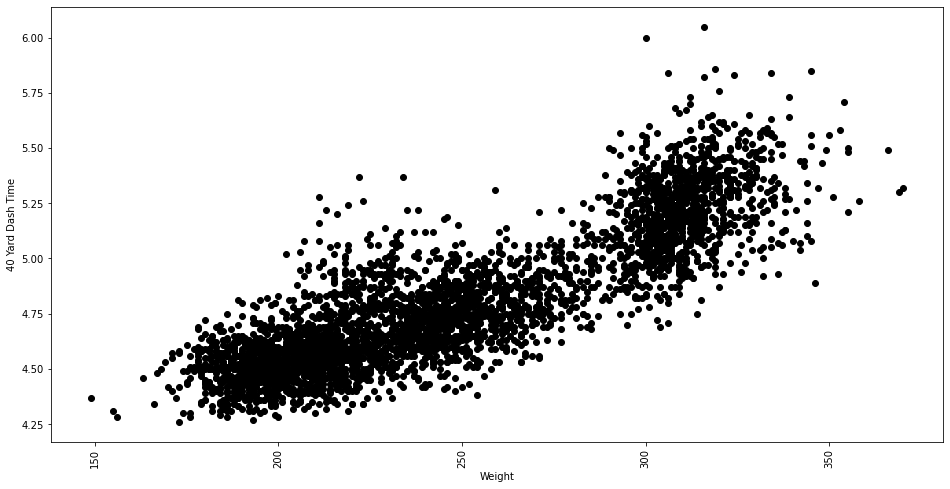

In [10]:
plt.figure(figsize=(16,8))
plt.scatter(data['Wt'], data['Forty'], c='black')
plt.xlabel('Weight')
plt.ylabel('40 Yard Dash Time')
plt.xticks(rotation=90)
plt.show()

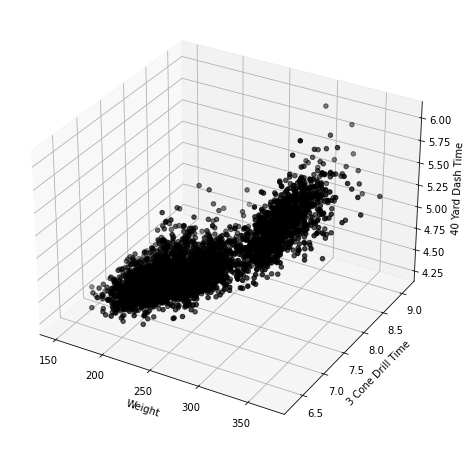

In [11]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Weight')
ax.set_ylabel('3 Cone Drill Time')
ax.set_zlabel('40 Yard Dash Time')
ax.scatter3D(data['Wt'], data['Cone'], data['Forty'], c='black');

plt.show()

## Splitting the dataset into the Training set and Test set

In [12]:
X = data[['Wt', 'Cone', 'Shuttle']].values
y = data['Forty'].values

In [13]:
print(X)

[[334.     8.48   4.98]
 [253.     7.29   4.49]
 [206.     7.18   4.15]
 ...
 [213.     6.94   4.15]
 [236.     7.38   4.48]
 [258.     6.99   4.4 ]]


In [14]:
print(y)

[5.56 4.97 4.55 ... 4.79 4.6  4.78]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [17]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5.2  5.3 ]
 [4.62 4.55]
 [5.12 4.96]
 ...
 [4.92 4.73]
 [5.06 4.69]
 [4.49 4.48]]


#### The model is not perfect but the multiple linear regression model is well adapted to this dataset.

## Making predictions

In [18]:
# Make a predication with the values (205, 7.0, 4.5) for the 'Wt', 'Cone', 'Shuttle' columns.
print(regressor.predict([[205, 7.0, 4.5]]))

[4.6]


In [19]:
# Make a predication with the values (195, 6.8, 4) for the 'Wt', 'Cone', 'Shuttle' columns.
print(regressor.predict([[195, 6.8, 4]]))

[4.44]


## Getting the final linear regression equation with the values of the coefficients

In [20]:
print(regressor.coef_)
print(regressor.intercept_)

[0.   0.2  0.17]
1.6985666536032205
